In [91]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch.utils.data import SubsetRandomSampler

In [92]:
data_transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
    ])
dataset = datasets.ImageFolder(root='/Users/jonascristens/Documents/CDA_project/Images',
                                           transform=data_transform)

In [132]:
batch_size = 16
validation_split = .33
shuffle_dataset = True
random_seed = 1

# Creating data indices for training and validation splits:
dataset_size = len(dataset)

indices = list(range(dataset_size))

split = int(np.floor(validation_split * dataset_size))

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)

In [133]:
train_indices, val_indices = indices[split:], indices[:split]

In [134]:
# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

In [135]:
mapping = hymenoptera_dataset.class_to_idx

In [141]:
len(train_loader)

862

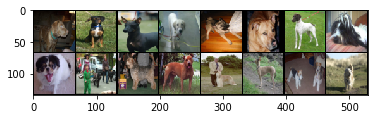

In [137]:
def show_landmarks_batch(sample_batched):
    images_batch, image_class = sample_batched
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    
for i_batch, sample_batched in enumerate(train_loader):
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.show()
        break